<a href="https://colab.research.google.com/github/jiseon0516/pdm19/blob/main/py-tensorflow/DL2-CNN/dl2_01_mnist_CNN_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN model of mnist dataset**
- Conv2D + FCN
    * Conv2D : 2차원 합성곱 필터링 + 풀링(Pooling)
    - > 2차원 필터로 영상을 대표하는 특징을 추출
    * FCN : 1차원 완전연결신경망
    - > Conv2D에서 추출된 대표 특징들을 이용하여 FCN으로 최종 학습 완료
- pooling: feature의 대표적 특징 추출 후 계산(평균값, 최빈값 등) + convolution 반복 후 1차원으로 -> fcn
- hidden layer1: convolution 노드, hidden layer2: 부분으로 된 pooling 노드(부분적 모양), hidden layer3: 부분으로 된 pooling 노드를 다시 pooling으로 모음(전체적 모양)
***

![mnist_NN_2_layers](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

(source: https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

print(tf.__version__)

2.7.0


## **데이터 로딩, 정규화**

In [2]:
from keras.datasets import mnist

(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

# Reshape
X_train = X_train0.reshape(60000,28,28,1)
X_test = X_test0.reshape(10000,28,28,1)

# Normalization
X_train, X_test = X_train/255.0, X_test/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train0.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test0.shape))

11501568/11490434 [==============================] - 0s 0us/step
X_train=(60000, 28, 28, 1)
y_train=(60000,)
X_test=(10000, 28, 28, 1)
y_test=(10000,)


In [3]:
# One-Hot-Encoding
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)
y_train.shape,y_test.shape

((60000, 10), (10000, 10))

### Display numbers
- 10 representative numbers

(5923, 28, 28)
(6742, 28, 28)
(5958, 28, 28)
(6131, 28, 28)
(5842, 28, 28)
(5421, 28, 28)
(5918, 28, 28)
(6265, 28, 28)
(5851, 28, 28)
(5949, 28, 28)


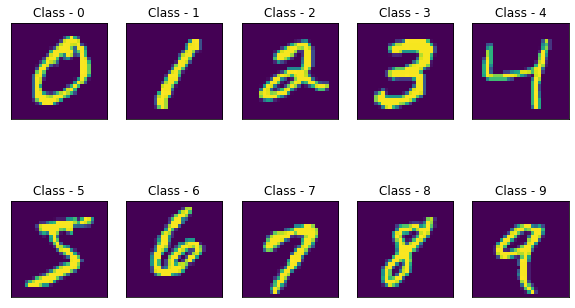

In [4]:
class_names = ["0","1","2","3","4","5","6","7","8","9"]
fig = plt.figure(figsize=(10,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    num0_9 = X_train0[y_train0 == i]
    print(num0_9.shape)
    plt.imshow(num0_9[0]) #, cmap='gray') #, interpolation='none')
    plt.title("Class - %d" % (i))
    plt.xticks([])
    plt.yticks([])




# Design CNN

### import Conv2D, MaxPool2D

In [5]:
from keras.layers import Conv2D, MaxPool2D, Flatten

## **CNN1 + FCN2**
- CNN1: Conv2D + MaxPooling2D
- FCN2: Dense(128) + Output(10) 

In [6]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [13]:
c1f2 = keras.models.Sequential([ #순차모델 cf.함수모델
    Conv2D(input_shape=(28,28,1), filters= 32, #input_shape=(28,28,1): 컬러채널 포함, filters= 32: 32가지의 필터
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'), 
            #kernel_size=(3,3): 2차원 필터 3x3, strides=(1,1): 좌 또는 우 이동 시 한칸씩 이동, padding='same': 가장자리쪽 나머지 0으로 채워 모두 convolution 되도록 => 30x30(convolution filter)
    MaxPool2D(pool_size=(2,2), strides=(2,2)), #32*28*28, pool_size=(2,2): 2x2 사이즈로 최대값 찾아내기=>중복x(차원축소위해)=>strides=(2,2):2칸씩 이동
    #convolution 노드 - conv2d, maxpool2d(차원축소)

    #1차원 벡터로 바꾸기
    Flatten(), #max-pooling 된 2차원 행렬을 1차원 벡터로 바꾸는 함수

    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax') 
])

c1f2.compile(optimizer='adam',
              loss='categorical_crossentropy', #one-hot-encoding 했을 때
              metrics=['accuracy']) #정확도 중심으로 계산

In [ ]:
# #convolution layer
# Conv2D(input_shape=(28,28,1), filters= 32, #input_shape=(28,28,1): 컬러채널 포함, filters= 32: 32가지의 필터
#             kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'), 
#             #kernel_size=(3,3): 2차원 필터 3x3, strides=(1,1): 좌 또는 우 이동 시 한칸씩 이동, padding='same': 가장자리쪽 나머지 0으로 채워 모두 convolution 되도록 => 30x30(convolution filter)
#     MaxPool2D(pool_size=(2,2), strides=(2,2)), #32*28*28, pool_size=(2,2): 2x2 사이즈로 최대값 찾아내기=>중복x(차원축소위해)=>strides=(2,2):2칸씩 이동
#     #convolution 노드 - conv2d, maxpool2d(차원축소)

#     #1차원 벡터로 바꾸기
#     Flatten(),

In [14]:
c1f2.summary()
#conv2d (Conv2D)             (None, 28, 28, 32)        320 = 3*3*32+32    => 첫번째 convolution layer(3x3 filter)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               802944    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

In [15]:
3*3*32+32 
#각 뉴런마다 bias 존재(+32)
#32개의 3x3 필터

320

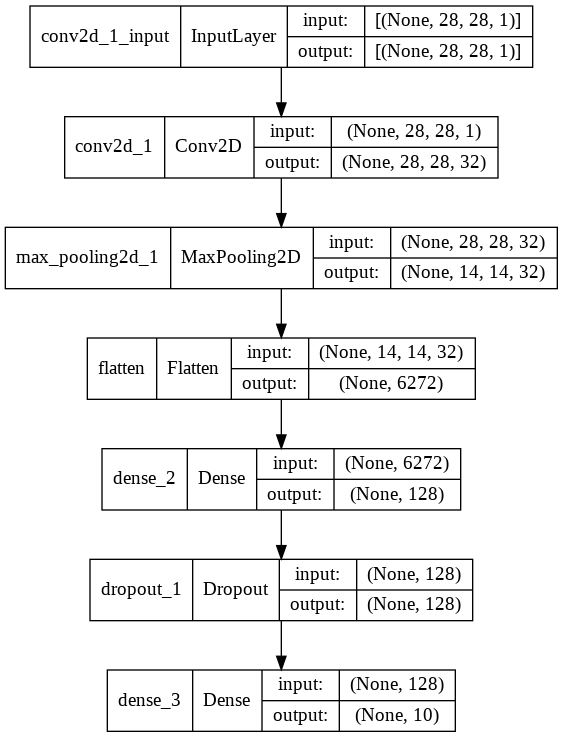

In [16]:
# Plot model
from tensorflow.keras.utils import plot_model
plot_model(c1f2, show_shapes=True, show_layer_names=True, to_file='model_c1f2.png')

In [18]:
# c1f2.fit(X_train, y_train, epochs = 20,  batch_size = 100, 
#             validation_data = (X_test, y_test))
#ValueError: Shapes (100, 10) and (100, 14, 14, 10) are incompatible - Flatten 하지 않음 - c1f2

c1f2.fit(X_train, y_train, epochs = 20,  batch_size = 100, 
            validation_data = (X_test, y_test)) #test data로 검증

Epoch 1/20
600/600 [==============================] - 35s 9ms/step - loss: 0.2245 - accuracy: 0.9349 - val_loss: 0.0723 - val_accuracy: 0.9771
Epoch 2/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0749 - accuracy: 0.9779 - val_loss: 0.0505 - val_accuracy: 0.9842
Epoch 3/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0525 - accuracy: 0.9839 - val_loss: 0.0443 - val_accuracy: 0.9846
Epoch 4/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0404 - accuracy: 0.9878 - val_loss: 0.0384 - val_accuracy: 0.9875
Epoch 5/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0314 - accuracy: 0.9898 - val_loss: 0.0391 - val_accuracy: 0.9869
Epoch 6/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0266 - accuracy: 0.9917 - val_loss: 0.0344 - val_accuracy: 0.9891
Epoch 7/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0228 - accuracy: 0.9926 - val_loss: 0.0357 - val_accuracy: 0.9885
Epoch

In [19]:
c1f2.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 0s 4ms/step - loss: 0.0471 - accuracy: 0.9885


[0.04707975313067436, 0.9884999990463257]

---

## **CNN1 + FCN3**
- cnn1 + fcn3(= 2개의 hidden layer와 output layer = 3개의 층)

In [20]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [22]:
c1f3 = tf.keras.models.Sequential([ 
    # tf.keras.layers.Flatten(input_shape=(28, 28)), 
    Conv2D(input_shape=(28,28,1), filters= 32,
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

c1f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [24]:
c1f3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 dense_7 (Dense)             (None, 256)               1605888   
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                      

In [25]:
c1f3.fit(X_train,y_train, epochs= 20 , batch_size = 100)

Epoch 1/20
600/600 [==============================] - 6s 8ms/step - loss: 0.2496 - accuracy: 0.9244
Epoch 2/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0762 - accuracy: 0.9781
Epoch 3/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0514 - accuracy: 0.9844
Epoch 4/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0381 - accuracy: 0.9876
Epoch 5/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0290 - accuracy: 0.9908
Epoch 6/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0237 - accuracy: 0.9927
Epoch 7/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0200 - accuracy: 0.9937
Epoch 8/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0164 - accuracy: 0.9947
Epoch 9/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0156 - accuracy: 0.9952
Epoch 10/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0130 - accuracy: 0.9957

In [26]:
c1f3.evaluate(X_test, y_test, batch_size= 100)

100/100 [==============================] - 1s 5ms/step - loss: 0.0502 - accuracy: 0.9884


[0.05021820217370987, 0.9883999824523926]

## **CNN2 + FCN2**
- convolution 2층 + fcn 2층

In [56]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [57]:
c2f2 = tf.keras.models.Sequential([ 
    # tf.keras.layers.Flatten(input_shape=(28, 28)),
    # tf.keras.layers.Dense(256, activation='relu'),  
    # tf.keras.layers.Dropout(0.25),
    Conv2D(input_shape=(28,28,1), filters= 64, 
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'), #convolution layer 1개 생성(filter = 64)
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(filters= 32,
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'), #convolution layer 2개 생성(filter = 32), input 정보는 첫 번째만 넣어줌
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Flatten(), #특징벡터로 만듦
    tf.keras.layers.Dense(128, activation='relu'),   
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

c2f2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [58]:
c2f2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 1568)              0         
                                                                 
 dense_15 (Dense)            (None, 128)              

In [30]:
c2f2.fit(X_train, y_train, epochs = 20 , batch_size = 100) #validation 없이 훈련만 시킴 -> 빠른 속도
#밑의 accuracy는 training에 대한 accuracy

Epoch 1/20
600/600 [==============================] - 6s 9ms/step - loss: 0.2208 - accuracy: 0.9331
Epoch 2/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0661 - accuracy: 0.9800
Epoch 3/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0466 - accuracy: 0.9858
Epoch 4/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0374 - accuracy: 0.9886
Epoch 5/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0303 - accuracy: 0.9904
Epoch 6/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0260 - accuracy: 0.9919
Epoch 7/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0228 - accuracy: 0.9927
Epoch 8/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0190 - accuracy: 0.9937
Epoch 9/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0171 - accuracy: 0.9942
Epoch 10/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0140 - accuracy: 0.9954

In [31]:
c2f2.evaluate(X_test, y_test, batch_size = 100) #convolution 층을 늘리면 정확도 증가

100/100 [==============================] - 1s 6ms/step - loss: 0.0304 - accuracy: 0.9918


[0.030393356457352638, 0.9918000102043152]

## **CNN2 + FCN3**

In [68]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [69]:
c2f3 = tf.keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1), filters= 64, 
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'), #convolution layer 1개 생성(filter = 64)
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(filters= 32,
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'), #convolution layer 2개 생성(filter = 32), input 정보는 첫 번째만 넣어줌
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Flatten(), #특징벡터로 만듦
    tf.keras.layers.Dense(128, activation='relu'),  #fcn 1층  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(64, activation='relu'),   #fcn 2층
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax') #output layer - 3층
])

c2f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [34]:
c2f3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1568)              0         
                                                                 
 dense_12 (Dense)            (None, 128)              

In [35]:
c2f3.fit(X_train, y_train, epochs=20, batch_size = 100)

Epoch 1/20
600/600 [==============================] - 6s 10ms/step - loss: 0.3019 - accuracy: 0.9076
Epoch 2/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0892 - accuracy: 0.9743
Epoch 3/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0616 - accuracy: 0.9822
Epoch 4/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0512 - accuracy: 0.9856
Epoch 5/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0406 - accuracy: 0.9879
Epoch 6/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0361 - accuracy: 0.9898
Epoch 7/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0319 - accuracy: 0.9909
Epoch 8/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0261 - accuracy: 0.9922
Epoch 9/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0231 - accuracy: 0.9930
Epoch 10/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0223 - accuracy: 0.993

In [36]:
c2f3.evaluate(X_test, y_test, batch_size = 100) #c2f2: 99.32, c2f3: 99.27(교수님 결과)
#층을 높이면 정확도 증가하지만 항상은 아님

100/100 [==============================] - 1s 6ms/step - loss: 0.0304 - accuracy: 0.9927


[0.0303812138736248, 0.9926999807357788]

# **[DIY] Hidden layer에 따른 정확도**

In [38]:
c1f2.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 0s 4ms/step - loss: 0.0471 - accuracy: 0.9885


[0.04707975313067436, 0.9884999990463257]

In [37]:
c1f3.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 1s 5ms/step - loss: 0.0502 - accuracy: 0.9884


[0.05021820217370987, 0.9883999824523926]

In [39]:
# Try another method!!
cnn_result = [[0.04707975313067436, 0.9884999990463257], 
 [0.05021820217370987, 0.9883999824523926], 
 [0.030393356457352638, 0.9918000102043152], 
 [0.0303812138736248, 0.9926999807357788]]

In [48]:
# select accuracies
accuracy = [row[1] for row in cnn_result]
accuracy

[0.9884999990463257,
 0.9883999824523926,
 0.9918000102043152,
 0.9926999807357788]

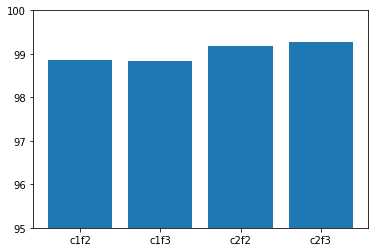

In [49]:
x = np.arange(4)
cnns = ['c1f2','c1f3','c2f2','c2f3']
accuracies = [acc*100 for acc in accuracy] # %

plt.bar(x, accuracies)
plt.xticks(x, cnns)
plt.ylim((95, 100))
plt.show()

## 모형의 저장

- 트레이닝이 끝난 모형은 save 메서드로 가중치와 함께 hdf5 형식으로 저장
- load 명령으로 불러 사용

In [52]:
c2f2.save('c2f2_best.hdf5')

In [54]:
from keras.models import load_model

model = load_model('c2f2_best.hdf5')
model.evaluate(X_test, y_test, batch_size=100)

100/100 [==============================] - 1s 6ms/step - loss: 0.0304 - accuracy: 0.9918


[0.030393356457352638, 0.9918000102043152]

## C2F2 모델에 대한 loss, accuracy 그래프를 그리시오.

In [59]:
#c2f2 모델 초기화 후 학습시킴, hist 객체에 정보를 담아야 함
hist = c2f2.fit(X_train, y_train, 
         epochs = 20 , 
         batch_size = 100, 
         validation_data=(X_test,y_test)) #train data로 훈련, test data로 검증

Epoch 1/20
600/600 [==============================] - 7s 10ms/step - loss: 0.2206 - accuracy: 0.9329 - val_loss: 0.0508 - val_accuracy: 0.9843
Epoch 2/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0661 - accuracy: 0.9800 - val_loss: 0.0349 - val_accuracy: 0.9886
Epoch 3/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0465 - accuracy: 0.9857 - val_loss: 0.0307 - val_accuracy: 0.9900
Epoch 4/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0366 - accuracy: 0.9887 - val_loss: 0.0296 - val_accuracy: 0.9883
Epoch 5/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0300 - accuracy: 0.9903 - val_loss: 0.0258 - val_accuracy: 0.9918
Epoch 6/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0258 - accuracy: 0.9919 - val_loss: 0.0243 - val_accuracy: 0.9913
Epoch 7/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0226 - accuracy: 0.9930 - val_loss: 0.0242 - val_accuracy: 0.9923

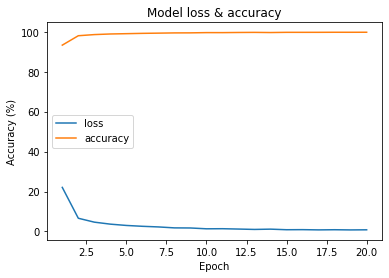

In [65]:
# Plot loass and accuracy
# Plot training & validation accuracy values
epochs = 20
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')
plt.show()

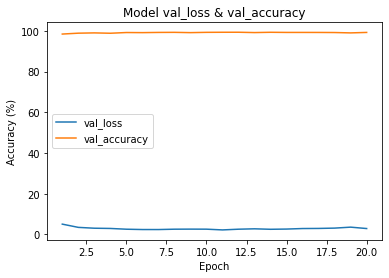

In [66]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')
plt.show()

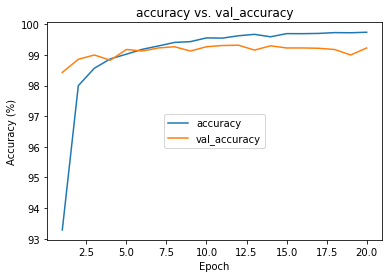

In [67]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center')
plt.show()

***

## [DIY] C2F3 모델에 대한 loss, accuracy 그래프를 추가하시오.

In [70]:
# Code here!
hist = c2f3.fit(X_train, y_train, 
         epochs = 20 , 
         batch_size = 100, 
         validation_data=(X_test,y_test)) 

Epoch 1/20
297/600 [=============>................] - ETA: 2s - loss: 0.4728 - accuracy: 0.8515

KeyboardInterrupt: ignored